<a href="https://colab.research.google.com/github/AAskarkyzy/MSW/blob/main/MSW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Úvod do lineární algebry

<ipython-input-1-c3ba1b9f3ceb>:15: RuntimeWarning: overflow encountered in scalar multiply
  x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i+1:], x[i+1:]))
<ipython-input-1-c3ba1b9f3ceb>:15: RuntimeWarning: invalid value encountered in scalar subtract
  x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i+1:], x[i+1:]))


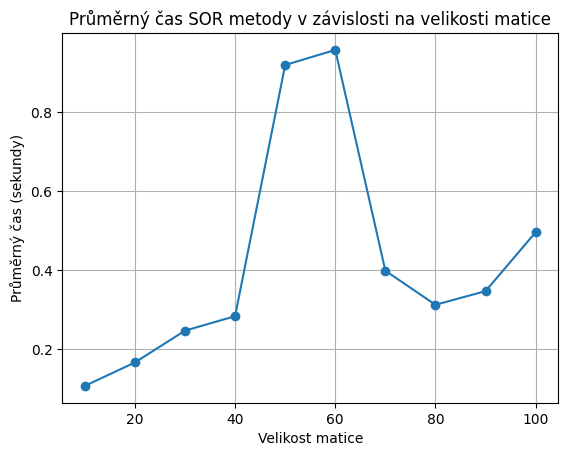

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# generuju náhodnou čtvercovou matici dané velikosti size
def generate_random_matrix(size):
    return np.random.rand(size, size)

# funkce sor která řeší problem metodou SOR
def sor(A, b, omega=1.2, tol=1e-6, max_iter=1000):
    # velikost soustavy rovnic na zaklade vektoru "b"
    n = len(b)
    # inicializuju vektor x (počáteční aproximace řešení) nulami
    x = np.zeros(n)
    # do x_new ukladam nove reseni v kazde iteraci
    x_new = np.zeros(n)
    # spocita pocet iteraci
    iterations = 0
    while iterations < max_iter:
        for i in range(n):
          # aktualizuju "i" prvek vektoru x_new podle vzorce metosu SOR
            x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i+1:], x[i+1:]))
        # testuje zda je dosazeno dostatečného kritéria konvergence
        if np.linalg.norm(x_new - x) < tol:
            break
        # prenese nove x_new do "x" pro dalsi iteraci
        x = x_new.copy()
        # Tento řádek inkrementuje počítadlo iterací.
        iterations += 1
    return x, iterations

# měří průměrný čas
def average_time_sor(matrix_sizes, num_trials=10):
    # pro ukladani prumernych casu
    avg_times = []
    for size in matrix_sizes:
        # prazdny seznam pro ukladani casu k reseni konkretni velikosti matice
        times = []
        for _ in range(num_trials):
            # kazda iterace vytvori novou nahodnou matici "A"
            A = generate_random_matrix(size)
            # generuje se nahodny vektor pravych stran "b"
            b = np.random.rand(size)
            # aktualni cas pres spustenim metody SOR
            start_time = time.time()
            # vola funkci sor
            sor(A, b)
            end_time = time.time()
            # pridava do seznamu "times" dobu trvani reseni soustavy
            times.append(end_time - start_time)
        # pridava prumerny cas reseni soustavy pro danou velikost matice do seznmau avg_times
        avg_times.append(np.mean(times))
    return avg_times

# vytvori maticy od 10 do 100 s krokem 10
matrix_sizes = range(10, 101, 10)
# vola se funkce average_time_sor, ktera vrati prumerny cas pro reseni
# a prumerne casy jsou ulozeni do seznamu avg_times_sor
avg_times_sor = average_time_sor(matrix_sizes)

# vytvori graf. x=matrix_sizes, y=avg_times_sor
plt.plot(matrix_sizes, avg_times_sor, marker='o', linestyle='-')
plt.title('Průměrný čas SOR metody v závislosti na velikosti matice')
plt.xlabel('Velikost matice')
plt.ylabel('Průměrný čas (sekundy)'
# mřížka v pozadi grafu
plt.grid(True)
plt.show()
